# **SEASONAL SALES COLLECTION ANALYSIS ON ZARA SALES DATASET**

## **Setting Enviroment For The Project**

In [1]:
# List all files in the specified directory and its subdirectories
input_files <- list.files("/kaggle/input", recursive = TRUE, full.names = TRUE)

# Print the list of files
print(input_files)

[1] "/kaggle/input/data-penjualan-zara/zara.csv"


In [10]:
library(ggplot2) # For data visualization
library(readr)   # For reading CSV files
# Suppress warnings
options(warn=-1)


In [9]:
# Read CSV file
df <- read.csv("/kaggle/input/data-penjualan-zara/zara.csv", sep = ";")

# Display the first few rows of the data frame
head(df)


,Product.ID,Product.Position,Promotion,Product.Category,Seasonal,Sales.Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket-p06985450.html,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop fabric. High collar and adjustable long sleeves with adhesive straps. Welt pockets at hip. Adjustable hem with side elastics. Front zip closure.,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
2,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p08896675.html,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and long sleeves with buttoned cuffs. Welt pockets at hip and interior pocket. Central back vent at hem. Front button closure.,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
3,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacket-p01564520.html,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sleeves with buttoned cuffs. Welt pocket at chest and flap pockets at hip. Interior pocket. Back vents. Front button closure.,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
4,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket-p01564300.html,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. Notched lapel collar. Long sleeves with buttoned cuffs. Welt pocket at chest and flap pockets at hip. Interior pocket. Back vents. Front button closure.,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
5,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket-p08281477.html,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling with fleece interior. Tabbed lapel collar. Long sleeves. Zip pockets at hip. Front zip closure.,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN
6,117590,End-cap,No,Clothing,No,2968,Zara,https://www.zara.com/us/en/contrasting-collar-jacket-p06987331.html,320298385-807-2,CONTRASTING COLLAR JACKET,Relaxed fit jacket. Contrasting lapel collar and long sleeves with buttoned cuffs. Front pouch pockets. Interior pocket. Washed effect. Front zip closure.,79.90,USD,2024-02-19T08:50:09.140497,jackets,MAN


## **Exploring Zara Dataset**

In [12]:
# Get the list of column names
column_names <- names(df)

# Print the list of column names
print(column_names)


 [1] "Product.ID"       "Product.Position" "Promotion"        "Product.Category"
 [5] "Seasonal"         "Sales.Volume"     "brand"            "url"             
 [9] "sku"              "name"             "description"      "price"           
[13] "currency"         "scraped_at"       "terms"            "section"         


In [13]:
# Get the number of rows
num_rows <- nrow(df)

# Get the number of columns
num_cols <- ncol(df)

# Print the number of rows and columns
cat("Number of rows:", num_rows, "\n")
cat("Number of columns:", num_cols, "\n")


Number of rows: 252 
Number of columns: 16 


In [14]:
# Display the variable type of each column
str(df)


'data.frame':	252 obs. of  16 variables:
 $ Product.ID      : int  185102 188771 180176 112917 192936 117590 189118 182157 141861 137121 ...
 $ Product.Position: chr  "Aisle" "Aisle" "End-cap" "Aisle" ...
 $ Promotion       : chr  "No" "No" "Yes" "Yes" ...
 $ Product.Category: chr  "Clothing" "Clothing" "Clothing" "Clothing" ...
 $ Seasonal        : chr  "No" "No" "Yes" "Yes" ...
 $ Sales.Volume    : int  2823 654 2220 1568 2942 2968 952 2421 1916 656 ...
 $ brand           : chr  "Zara" "Zara" "Zara" "Zara" ...
 $ url             : chr  "https://www.zara.com/us/en/basic-puffer-jacket-p06985450.html" "https://www.zara.com/us/en/tuxedo-jacket-p08896675.html" "https://www.zara.com/us/en/slim-fit-suit-jacket-p01564520.html" "https://www.zara.com/us/en/stretch-suit-jacket-p01564300.html" ...
 $ sku             : chr  "272145190-250-2" "324052738-800-46" "335342680-800-44" "328303236-420-44" ...
 $ name            : chr  "BASIC PUFFER JACKET" "TUXEDO JACKET" "SLIM FIT SUIT JACKET" "STRETCH 

In [15]:
# Check for null values
null_values <- is.na(df)

# Count the number of null values in each column
num_null <- colSums(null_values)

# Print the number of null values in each column
print(num_null)


      Product.ID Product.Position        Promotion Product.Category 
               0                0                0                0 
        Seasonal     Sales.Volume            brand              url 
               0                0                0                0 
             sku             name      description            price 
               0                0                0                0 
        currency       scraped_at            terms          section 
               0                0                0                0 


In [11]:
# Find the number of duplicated rows
num_duplicates <- sum(duplicated(df))

# Print the number of duplicated rows
print(num_duplicates)


[1] 0


In [16]:
summary(df)

   Product.ID     Product.Position    Promotion         Product.Category  
 Min.   :110075   Length:252         Length:252         Length:252        
 1st Qu.:131054   Class :character   Class :character   Class :character  
 Median :151682   Mode  :character   Mode  :character   Mode  :character  
 Mean   :153370                                                           
 3rd Qu.:175670                                                           
 Max.   :199631                                                           
   Seasonal          Sales.Volume     brand               url           
 Length:252         Min.   : 529   Length:252         Length:252        
 Class :character   1st Qu.:1243   Class :character   Class :character  
 Mode  :character   Median :1840   Mode  :character   Mode  :character  
                    Mean   :1824                                        
                    3rd Qu.:2399                                        
                    Max.   :2989     

In [17]:
incomplete_rows <- !complete.cases(df)

# Check if there are any incomplete rows
if (any(incomplete_rows)) {
  print("There are incomplete rows in the dataset.")
} else {
  print("There are no incomplete rows in the dataset.")
}



[1] "There are no incomplete rows in the dataset."


In [ ]:
# Unique product categories
unique_categories <- unique(df$Product.Category)

# Unique product names
unique_names <- unique(df$name)

# Display unique categories and names
print(unique_categories)
print(unique_names)


[[1]]
[1] "JACKET"

[[2]]
[1] "LINEN"

[[3]]
[1] "EDITION"

[[4]]
[1] "OVERSHIRT"

[[5]]
[1] "POCKETS"

[[6]]
[1] "POCKET"

[[7]]
character(0)

[[8]]
[1] "VEST"

[[9]]
[1] "CARDIGAN"

[[10]]
[1] "TOPSTITCHING"

[[11]]
[1] "SANDALS"

[[12]]
[1] "SNEAKERS"

[[13]]
[1] "HIGH-TOPS"

[[14]]
[1] "LOAFERS"

[[15]]
[1] "BOOTS"

[[16]]
[1] "SLIDES"

[[17]]
[1] "SWEATER"

[[18]]
[1] "PEARLS"

[[19]]
[1] "TOP"

[[20]]
[1] "BUTTONS"

[[21]]
[1] "PIPING"

[[22]]
[1] "RIPS"

[[23]]
[1] "JEANS"

[[24]]
[1] "SHIRT"

[[25]]
[1] "T-SHIRT"



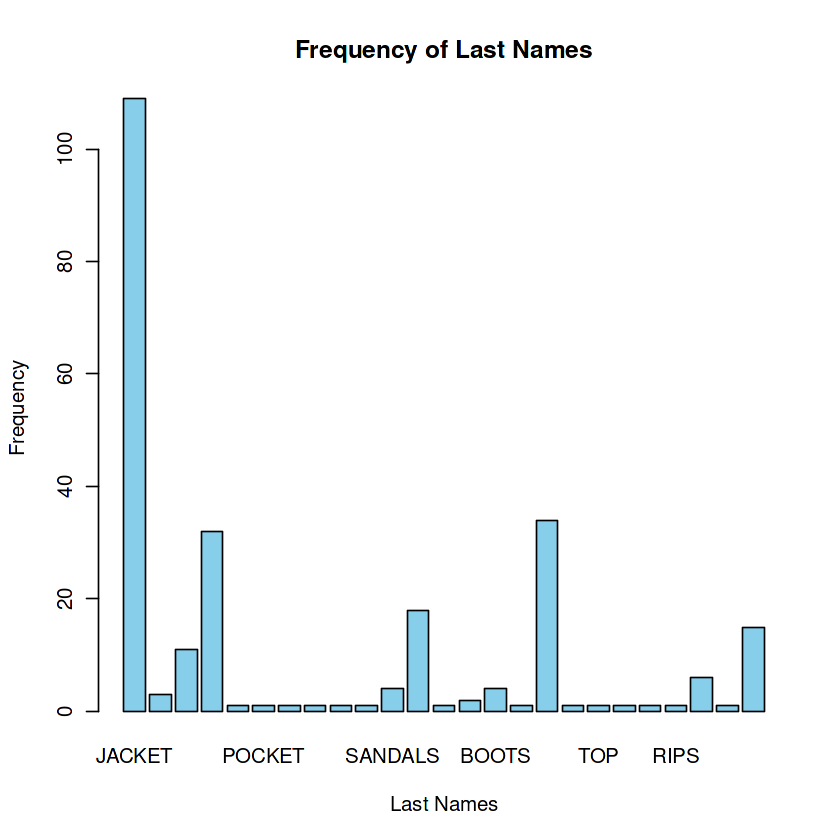

In [27]:
# Extract last names from product names
last_names <- sapply(strsplit(df$name, " "), function(x) tail(x, 1))

# Get unique last names
unique_last_names <- unique(last_names)

# Print unique last names
print(unique_last_names)

# Count the frequency of each unique last name
name_counts <- table(factor(last_names, levels = unique_last_names))

# Plot bar graph
barplot(name_counts, main = "Frequency of Last Names", xlab = "Last Names", ylab = "Frequency", col = "skyblue")




Exploring Quantitavtive data

In [24]:
# Print the column names of the dataframe
print(colnames(df))
#printing this here for my ese to type correct column names


 [1] "Product.ID"       "Product.Position" "Promotion"        "Product.Category"
 [5] "Seasonal"         "Sales.Volume"     "brand"            "url"             
 [9] "sku"              "name"             "description"      "price"           
[13] "currency"         "scraped_at"       "terms"            "section"         


In [25]:
# Generate descriptive statistics for numerical columns
summary_df <- summary(df[, c("price", "Sales.Volume")])

# Print the descriptive statistics
print(summary_df)


     price         Sales.Volume 
 Min.   :  7.99   Min.   : 529  
 1st Qu.: 49.90   1st Qu.:1243  
 Median : 79.90   Median :1840  
 Mean   : 86.25   Mean   :1824  
 3rd Qu.:109.00   3rd Qu.:2399  
 Max.   :439.00   Max.   :2989  


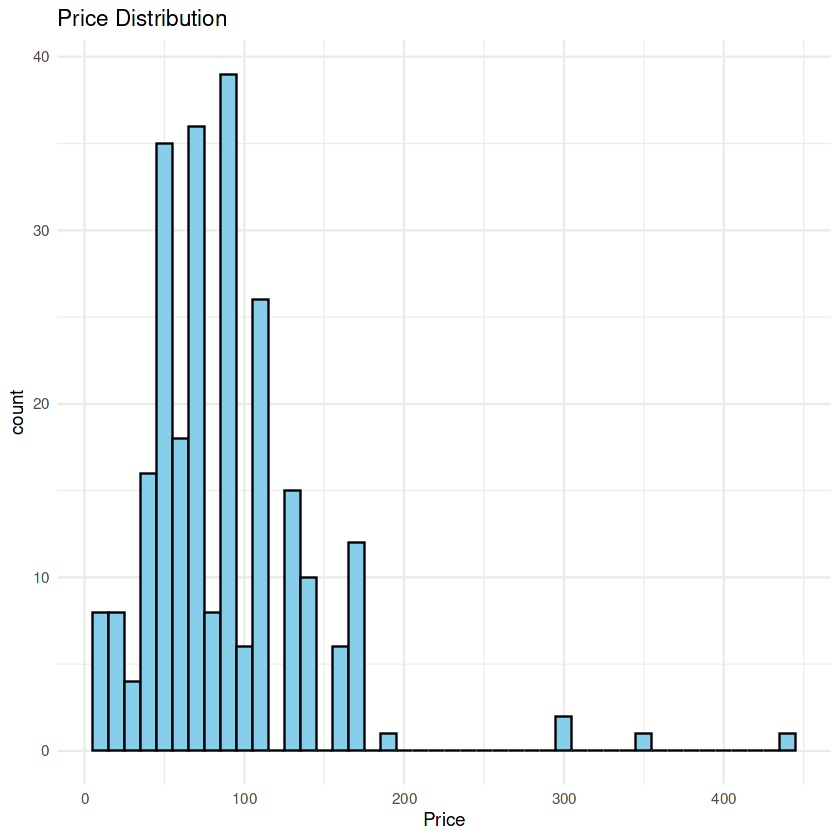

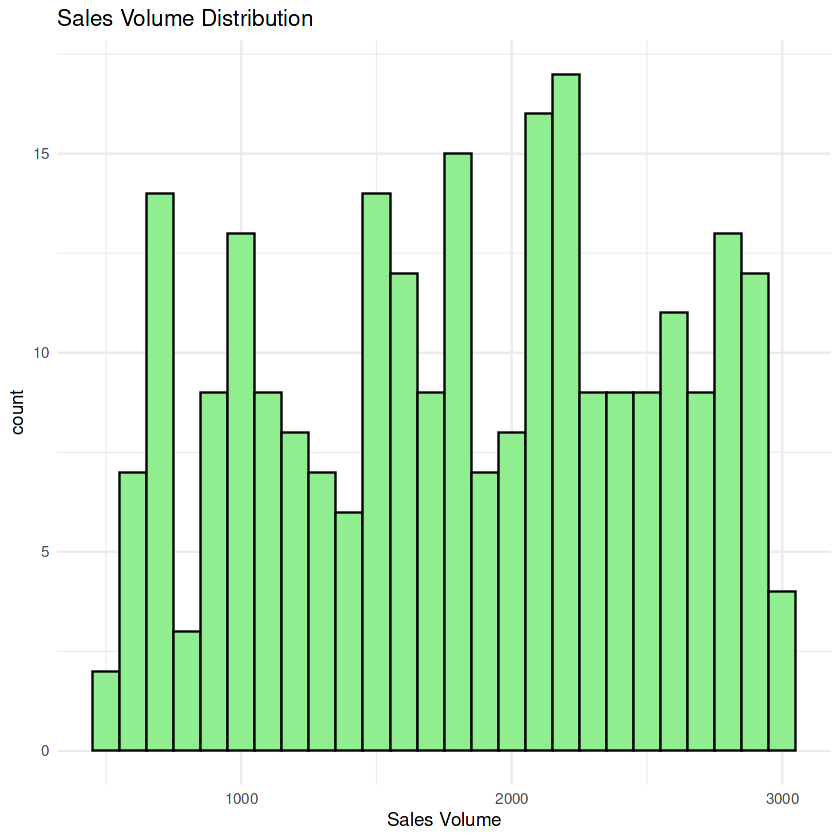

In [26]:
# Price distribution
ggplot(df, aes(x = price)) +
  geom_histogram(binwidth = 10, fill = "skyblue", color = "black") +
  labs(title = "Price Distribution", x = "Price") +
  theme_minimal()

# Sales Volume distribution
ggplot(df, aes(x = Sales.Volume)) +
  geom_histogram(binwidth = 100, fill = "lightgreen", color = "black") +
  labs(title = "Sales Volume Distribution", x = "Sales Volume") +
  theme_minimal()

In [28]:
# Calculate quartiles and IQR
Q1 <- quantile(df$price, 0.25)
Q3 <- quantile(df$price, 0.75)
IQR <- Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_extreme <- Q1 - 1.5 * IQR
upper_extreme <- Q3 + 1.5 * IQR

# Identify outliers
outlier_price <- df[df$price < lower_extreme | df$price > upper_extreme, ]
cat("The shape is:", nrow(outlier_price), " rows and ", ncol(outlier_price), " columns\n")
cat(rep("-", 20), "\n")
head(outlier_price, 11)



The shape is: 4  rows and  16  columns
- - - - - - - - - - - - - - - - - - - - 


,Product.ID,Product.Position,Promotion,Product.Category,Seasonal,Sales.Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
14,151396,Front of Store,Yes,Clothing,Yes,729,Zara,https://www.zara.com/us/en/cropped-leather-jacket-p02521104.html,323134418-800-3,CROPPED LEATHER JACKET,Leather jacket. Cropped length. Lapel collar and long sleeves. Front hidden in-seam pockets. Front zip closure.,439,USD,2024-02-19T08:50:13.771115,jackets,MAN
23,161909,Aisle,Yes,Clothing,No,1290,Zara,https://www.zara.com/us/en/leather-jacket-p05479400.html,315529534-705-3,LEATHER JACKET,Relaxed fit jacket in leather. Spread collar and long sleeves with slit cuffs with button closure. Patch pockets at hip. Back vents. Front button closure.,299,USD,2024-02-19T08:50:18.813979,jackets,MAN
39,114877,Aisle,No,Clothing,No,1860,Zara,https://www.zara.com/us/en/suede-jacket-p02521102.html,323134415-700-3,SUEDE JACKET,Jacket made of suede. Cropped length. Lapel collar and long sleeves. Front hidden in-seam pockets. Front zip closure.,349,USD,2024-02-19T08:50:29.497634,jackets,MAN
61,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leather-bomber-jacket-p02521300.html,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,,299,USD,2024-02-19T08:50:43.543555,jackets,MAN


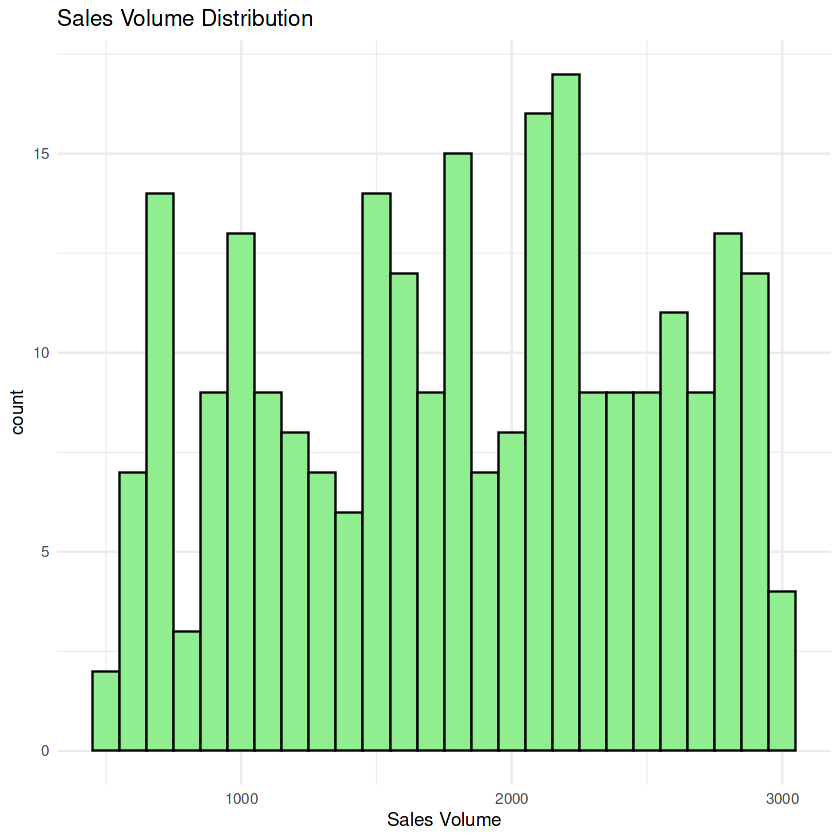

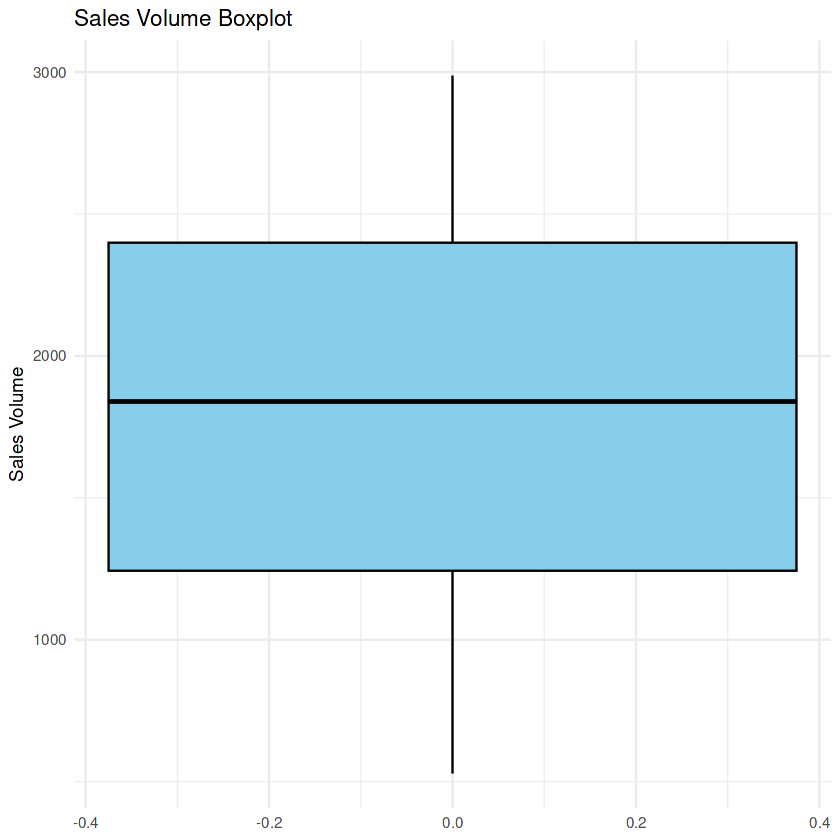

In [29]:
library(ggplot2)

# Sales Volume distribution
ggplot(df, aes(x = Sales.Volume)) +
  geom_histogram(binwidth = 100, fill = "lightgreen", color = "black") +
  labs(title = "Sales Volume Distribution", x = "Sales Volume") +
  theme_minimal()

# Sales Volume boxplot
ggplot(df, aes(y = Sales.Volume)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Sales Volume Boxplot", y = "Sales Volume") +
  theme_minimal()


Exploring Catagorical data

In [34]:
# Create a dataframe to store the information
summary_df <- data.frame(
  Length = sapply(df[sapply(df, is.character)], length),
  Class = sapply(df[sapply(df, is.character)], class),
  Mode = sapply(df[sapply(df, is.character)], mode),
  row.names = names(df[sapply(df, is.character)])
)

# Print the summary dataframe
print(summary_df)


                 Length     Class      Mode
Product.Position    252 character character
Promotion           252 character character
Product.Category    252 character character
Seasonal            252 character character
brand               252 character character
url                 252 character character
sku                 252 character character
name                252 character character
description         252 character character
currency            252 character character
scraped_at          252 character character
terms               252 character character
section             252 character character


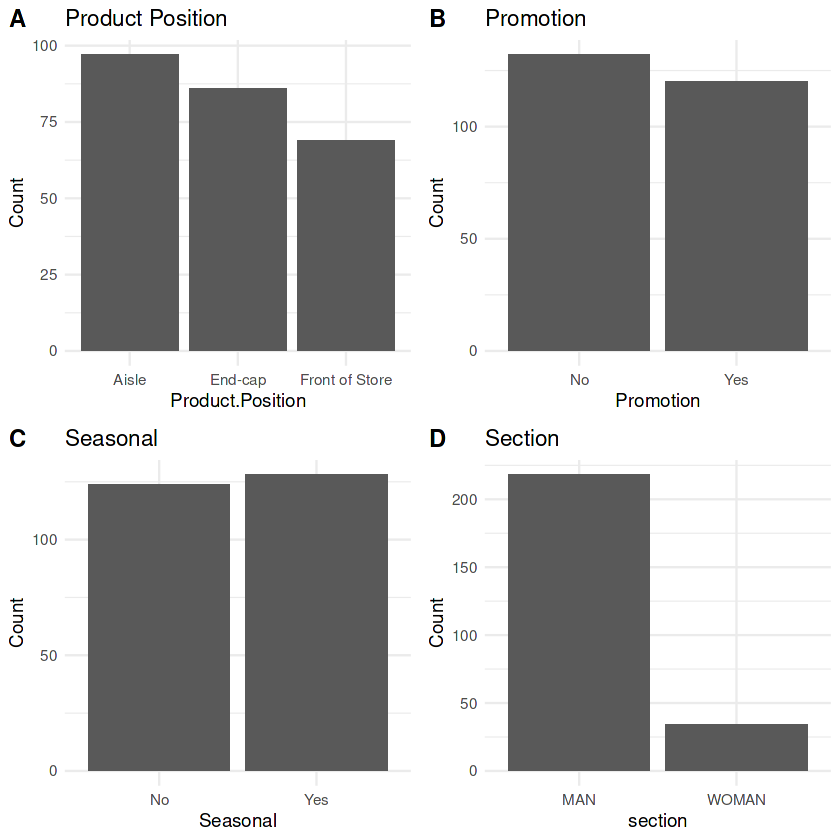

In [36]:
library(ggplot2)
library(cowplot)

# Create individual plots
plot1 <- ggplot(df, aes(x = Product.Position)) +
  geom_bar() +
  labs(title = "Product Position", y = "Count") +
  theme_minimal()

plot2 <- ggplot(df, aes(x = Promotion)) +
  geom_bar() +
  labs(title = "Promotion", y = "Count") +
  theme_minimal()

plot3 <- ggplot(df, aes(x = Seasonal)) +
  geom_bar() +
  labs(title = "Seasonal", y = "Count") +
  theme_minimal()

plot4 <- ggplot(df, aes(x = section)) +
  geom_bar() +
  labs(title = "Section", y = "Count") +
  theme_minimal()

# Combine plots
combined_plots <- plot_grid(plot1, plot2, plot3, plot4, nrow = 2, labels = c("A", "B", "C", "D"))

# Print the combined plots
print(combined_plots)


In [37]:
# Count of categories for Product Position
product_position_count <- table(df$Product.Position)

# Count of categories for Promotion
promotion_count <- table(df$Promotion)

# Count of categories for Seasonal
seasonal_count <- table(df$Seasonal)

# Count of categories for Section
section_count <- table(df$section)

# Print the counts
print("Product Position:")
print(product_position_count)

print("Promotion:")
print(promotion_count)

print("Seasonal:")
print(seasonal_count)

print("Section:")
print(section_count)


[1] "Product Position:"

         Aisle        End-cap Front of Store 
            97             86             69 
[1] "Promotion:"

 No Yes 
132 120 
[1] "Seasonal:"

 No Yes 
124 128 
[1] "Section:"

  MAN WOMAN 
  218    34 


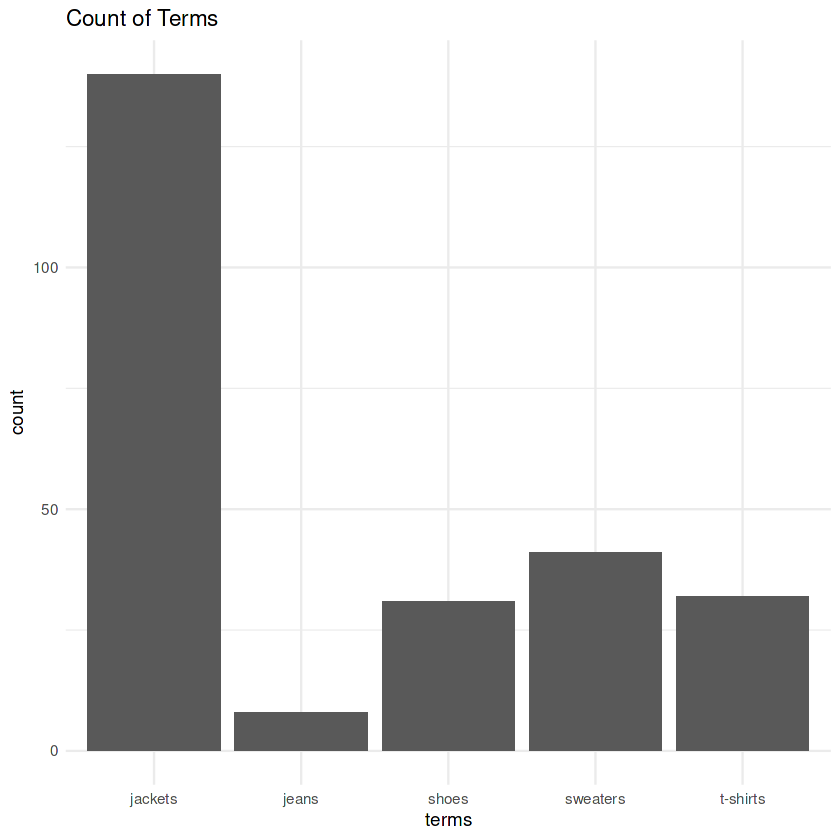

In [39]:


# Create a count plot for the 'terms' variable
ggplot(df, aes(x = terms)) +
  geom_bar() +
  labs(title = "Count of Terms") +
  theme_minimal()


**Exploring Relationships in Zara Sales Dataset Relevant to Seasonal Collections**


sALS VOLUME AND SEASONAL

In [55]:
# Calculate summary statistics by seasonal collection and product category
summary_stats <- aggregate(Sales.Volume ~ Seasonal + Product.Category, data = df, 
                           FUN = function(x) c(mean = mean(x), 
                                               median = median(x), 
                                               sd = sd(x)))
                           print(summary_stats)


  Seasonal Product.Category Sales.Volume.mean Sales.Volume.median
1       No         Clothing         1825.7419           1882.5000
2      Yes         Clothing         1821.7266           1813.5000
  Sales.Volume.sd
1        691.1038
2        706.7481


Seasonal and Product Category

In [32]:
# Descriptive Statistics
summary_stats <- aggregate(Sales.Volume ~ Seasonal + Product.Category, data = df, 
                           FUN = function(x) c(mean = mean(x), 
                                               median = median(x), 
                                               sd = sd(x)))
print(summary_stats)



  Seasonal Product.Category Sales.Volume.mean Sales.Volume.median
1       No         Clothing         1825.7419           1882.5000
2      Yes         Clothing         1821.7266           1813.5000
  Sales.Volume.sd
1        691.1038
2        706.7481


SESAONAL AND PROMOTION 

In [31]:
# Descriptive Statistics
summary_stats <- aggregate(Sales.Volume ~ Seasonal + Promotion, data = df, 
                           FUN = function(x) c(mean = mean(x), 
                                               median = median(x), 
                                               sd = sd(x)))
print(summary_stats)


  Seasonal Promotion Sales.Volume.mean Sales.Volume.median Sales.Volume.sd
1       No        No         1837.4000           1866.0000        715.7618
2      Yes        No         1804.1940           1796.0000        720.6794
3       No       Yes         1812.8983           1899.0000        668.7752
4      Yes       Yes         1840.9836           1916.0000        696.5794


PRODUCT CATEGORY ANF PROMOTION

In [38]:
# Calculate summary statistics
summary_stats <- aggregate(Sales.Volume ~ Product.Category + Promotion, data = df, 
                           FUN = function(x) c(mean = mean(x), 
                                               median = median(x), 
                                               sd = sd(x)))

# Print summary statistics
print(summary_stats)


  Product.Category Promotion Sales.Volume.mean Sales.Volume.median
1         Clothing        No         1820.5455           1831.5000
2         Clothing       Yes         1827.1750           1907.5000
  Sales.Volume.sd
1        715.7099
2        680.3245


Product Category and sales volume

In [37]:
# Calculate summary statistics for sales volume by product category
summary_stats <- aggregate(Sales.Volume ~ Product.Category, data = df, 
                           FUN = function(x) c(mean = mean(x), 
                                               median = median(x), 
                                               sd = sd(x)))

# Print summary statistics
cat("Summary statistics for sales volume by product category:\n")
print(summary_stats)


Summary statistics for sales volume by product category:
  Product.Category Sales.Volume.mean Sales.Volume.median Sales.Volume.sd
1         Clothing         1823.7024           1839.5000        697.7037


In [41]:
# Create a copy of the dataset
df_zara <- data.frame(df)

**DATA CLEANING & Prep**

In [ ]:
# Remove irrelevant columns
df_zara <- subset(df_zara, select = -c(Product.Category, brand, url, sku, description, currency, scraped_at))

In [ ]:
# Extract last names from product names
last_names <- sapply(strsplit(df_zara$name, " "), function(x) tail(x, 1))

# Create a new column named "Product type" containing the extracted last names
df_zara$Product_type <- last_names

In [50]:
df_zara <- subset(df_zara, select = -c(Product.ID))

In [53]:
head(df_zara)

,Product.Position,Promotion,Seasonal,Sales.Volume,name,price,terms,section,Product_type
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<list>
1,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,jackets,MAN,JACKET
2,Aisle,No,No,654,TUXEDO JACKET,169.00,jackets,MAN,JACKET
3,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,jackets,MAN,JACKET
4,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,jackets,MAN,JACKET
5,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,jackets,MAN,JACKET
6,End-cap,No,No,2968,CONTRASTING COLLAR JACKET,79.90,jackets,MAN,JACKET


In [54]:
# Drop rows with NA (null) values
df_zara_clean <- na.omit(df_zara)

# Drop rows with empty values (assuming empty strings)
df_zara_clean <- df_zara[!apply(df_zara == "", 1, all), ]

# Check the dimensions of the cleaned dataframe
print(dim(df_zara_clean))


[1] 252   9


In [56]:
# Replace "pockets" with "pocket" in the "Product type" column
df_zara$Product_type <- gsub("pockets", "pocket", df_zara$Product_type)

# Display the first few rows of the updated dataframe
print(head(df_zara))


  Product.Position Promotion Seasonal Sales.Volume                      name
1            Aisle        No       No         2823       BASIC PUFFER JACKET
2            Aisle        No       No          654             TUXEDO JACKET
3          End-cap       Yes      Yes         2220      SLIM FIT SUIT JACKET
4            Aisle       Yes      Yes         1568       STRETCH SUIT JACKET
5          End-cap        No      Yes         2942       DOUBLE FACED JACKET
6          End-cap        No       No         2968 CONTRASTING COLLAR JACKET
   price   terms section Product_type
1  19.99 jackets     MAN       JACKET
2 169.00 jackets     MAN       JACKET
3 129.00 jackets     MAN       JACKET
4 129.00 jackets     MAN       JACKET
5 139.00 jackets     MAN       JACKET
6  79.90 jackets     MAN       JACKET


In [77]:
# Check the data type of the "Product type" column
price_datatype <- class(df_zara$price)

# Print the data type
print(price_datatype)


[1] "numeric"


In [74]:
# Check for NA values in "Sales Volume" and "price" columns
missing_sales_volume <- sum(is.na(df_zara$`Sales.Volume`))
missing_price <- sum(is.na(df_zara$price))

# Replace NA values with 0
if (missing_sales_volume > 0) {
  df_zara$`Sales.Volume`[is.na(df_zara$`Sales.Volume`)] <- 0
}

if (missing_price > 0) {
  df_zara$price[is.na(df_zara$price)] <- 0
}


In [72]:
# Check column names
print(names(df_zara))

# Check data types of columns
print(sapply(df_zara, class))

# Summary statistics for numeric columns
print(summary(df_zara))


[1] "Product.Position" "Promotion"        "Seasonal"         "Sales.Volume"    
[5] "name"             "price"            "terms"            "section"         
[9] "Product_type"    
Product.Position        Promotion         Seasonal     Sales.Volume 
     "character"      "character"      "character"        "integer" 
            name            price            terms          section 
     "character"        "numeric"      "character"      "character" 
    Product_type 
     "character" 
 Product.Position    Promotion           Seasonal          Sales.Volume 
 Length:252         Length:252         Length:252         Min.   : 529  
 Class :character   Class :character   Class :character   1st Qu.:1243  
 Mode  :character   Mode  :character   Mode  :character   Median :1840  
                                                          Mean   :1824  
                                                          3rd Qu.:2399  
                                                          Max.   :2

In [80]:
# Print unique values of the "Sales Volume" column
print(unique(df_zara$`Sales Volume`))


NULL


In [81]:
# Check the structure of the dataframe
str(df_zara)


'data.frame':	252 obs. of  9 variables:
 $ Product.Position: chr  "Aisle" "Aisle" "End-cap" "Aisle" ...
 $ Promotion       : chr  "No" "No" "Yes" "Yes" ...
 $ Seasonal        : chr  "No" "No" "Yes" "Yes" ...
 $ Sales.Volume    : int  2823 654 2220 1568 2942 2968 952 2421 1916 656 ...
 $ name            : chr  "BASIC PUFFER JACKET" "TUXEDO JACKET" "SLIM FIT SUIT JACKET" "STRETCH SUIT JACKET" ...
 $ price           : num  20 169 129 129 139 ...
 $ terms           : chr  "jackets" "jackets" "jackets" "jackets" ...
 $ section         : chr  "MAN" "MAN" "MAN" "MAN" ...
 $ Product_type    : chr  "JACKET" "JACKET" "JACKET" "JACKET" ...


In [82]:
# Remove commas from "Sales.Volume" column and convert it to numeric
df_zara$`Sales.Volume` <- as.numeric(gsub(",", "", df_zara$`Sales.Volume`, fixed = TRUE))

# Check if any values were converted to NA during conversion
print(sum(is.na(df_zara$`Sales.Volume`)))

[1] 0


In [84]:
# Create a new column named "Total" as the product of "Sales.Volume" and "price"
df_zara$Total <- df_zara$`Sales.Volume` * df_zara$price


In [85]:
head(df_zara)

,Product.Position,Promotion,Seasonal,Sales.Volume,name,price,terms,section,Product_type,Total
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,jackets,MAN,JACKET,56431.77
2,Aisle,No,No,654,TUXEDO JACKET,169.00,jackets,MAN,JACKET,110526.00
3,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,jackets,MAN,JACKET,286380.00
4,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,jackets,MAN,JACKET,202272.00
5,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,jackets,MAN,JACKET,408938.00
6,End-cap,No,No,2968,CONTRASTING COLLAR JACKET,79.90,jackets,MAN,JACKET,237143.20


In [86]:
# Check the data type of the "Product type" column
price_datatype <- class(df_zara$price)

# Print the data type
print(price_datatype)

[1] "numeric"


In [87]:
# Replace values in the "section" column
df_zara$section <- ifelse(df_zara$section == "WOMAN", "Woman", df_zara$section)
df_zara$section <- ifelse(df_zara$section == "MAN", "Man", df_zara$section)

## **Exploratory Data Analysis**

In [100]:
library(dplyr)

# Summarize Total sales by section
section_sales <- df_zara %>%
  group_by(section) %>%
  summarize(Total_Sales = sum(Total))

# Print the result
print(section_sales)


# A tibble: 2 × 2
  section Total_Sales
  <chr>         <dbl>
1 Man       35712663.
2 Woman      3275813.


In [102]:
# Summarize Total sales by terms
terms_sales <- df_zara %>%
  group_by(terms) %>%
  summarize(Total_Sales = sum(Total)) %>%
  arrange(desc(Total_Sales))

# Print the result
print(terms_sales)


# A tibble: 5 × 2
  terms    Total_Sales
  <chr>          <dbl>
1 jackets    26581816.
2 sweaters    4090631.
3 shoes       3754838.
4 t-shirts    3696806.
5 jeans        864385.


In [104]:
library(dplyr)

# Summarize Total sales by terms
terms_sales <- df_zara %>%
  group_by(Product_type) %>%
  summarize(Total_Sales = sum(Total)) %>%
  arrange(desc(Total_Sales))

# Print the result
print(terms_sales)


# A tibble: 25 × 2
   Product_type Total_Sales
   <chr>              <dbl>
 1 JACKET         22046848.
 2 OVERSHIRT       4571134.
 3 SWEATER         3162736.
 4 SNEAKERS        1819954.
 5 EDITION         1685321.
 6 T-SHIRT          943860.
 7 BOOTS            856189.
 8 LINEN            816675 
 9 JEANS            696826.
10 SANDALS          489924.
# ℹ 15 more rows


'data.frame':	2 obs. of  2 variables:
 $ Seasonal    : chr  "No" "Yes"
 $ Sales.Volume: num  226392 233181


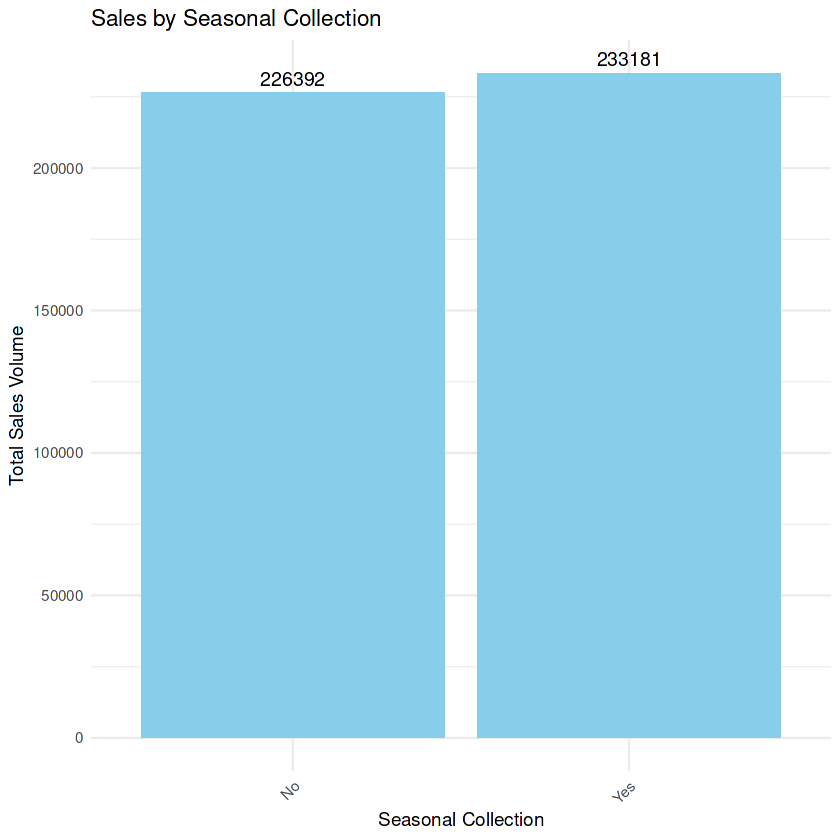

In [98]:
# Check the data type of the Sales.Volume column
str(sales_by_season)

# Convert Sales.Volume to numeric if necessary
sales_by_season$Sales.Volume <- as.numeric(sales_by_season$Sales.Volume)

# Plot sales by seasonal collection
ggplot(sales_by_season, aes(x = Seasonal, y = Sales.Volume)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Sales by Seasonal Collection",
       x = "Seasonal Collection",
       y = "Total Sales Volume") +
  geom_text(aes(label = Sales.Volume), vjust = -0.5, color = "black", size = 4) +  # Add text labels
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels if needed


In [99]:
str(df_zara)


'data.frame':	252 obs. of  11 variables:
 $ Product.Position: chr  "Aisle" "Aisle" "End-cap" "Aisle" ...
 $ Promotion       : chr  "No" "No" "Yes" "Yes" ...
 $ Seasonal        : chr  "No" "No" "Yes" "Yes" ...
 $ Sales.Volume    : num  2823 654 2220 1568 2942 ...
 $ name            : chr  "BASIC PUFFER JACKET" "TUXEDO JACKET" "SLIM FIT SUIT JACKET" "STRETCH SUIT JACKET" ...
 $ price           : num  20 169 129 129 139 ...
 $ terms           : chr  "jackets" "jackets" "jackets" "jackets" ...
 $ section         : chr  "Man" "Man" "Man" "Man" ...
 $ Product_type    : chr  "JACKET" "JACKET" "JACKET" "JACKET" ...
 $ Total           : num  56432 110526 286380 202272 408938 ...
 $ scraped_at      : Date, format: "2024-02-19" "2024-02-19" ...


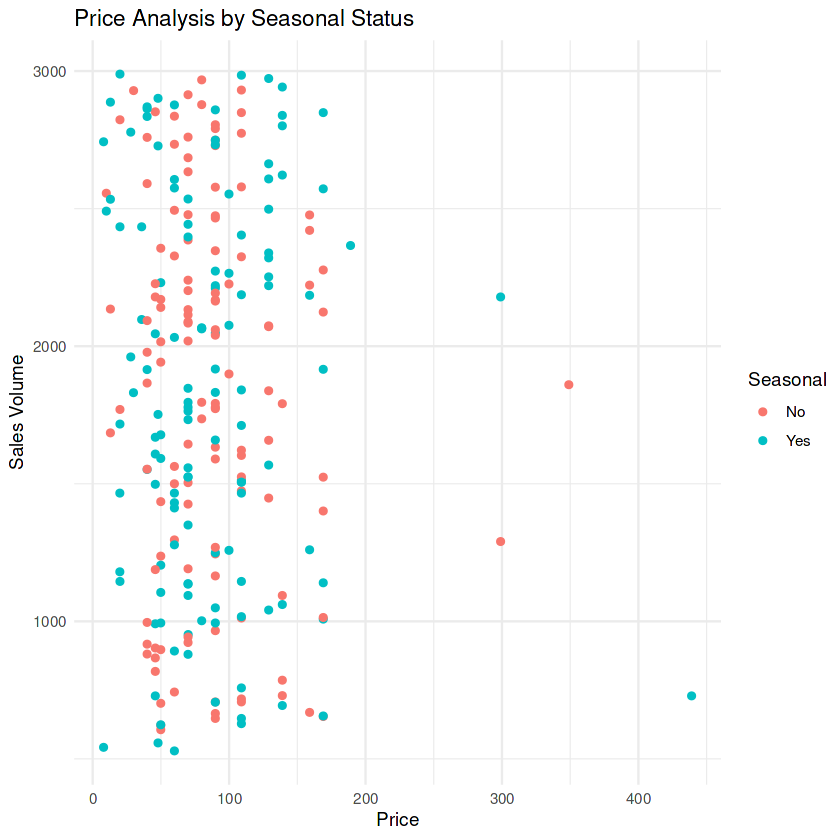

In [109]:
# Price analysis
ggplot(df, aes(x = price, y = Sales.Volume, color = Seasonal)) +
  geom_point() +
  labs(title = "Price Analysis by Seasonal Status",
       x = "Price",
       y = "Sales Volume") +
  theme_minimal()

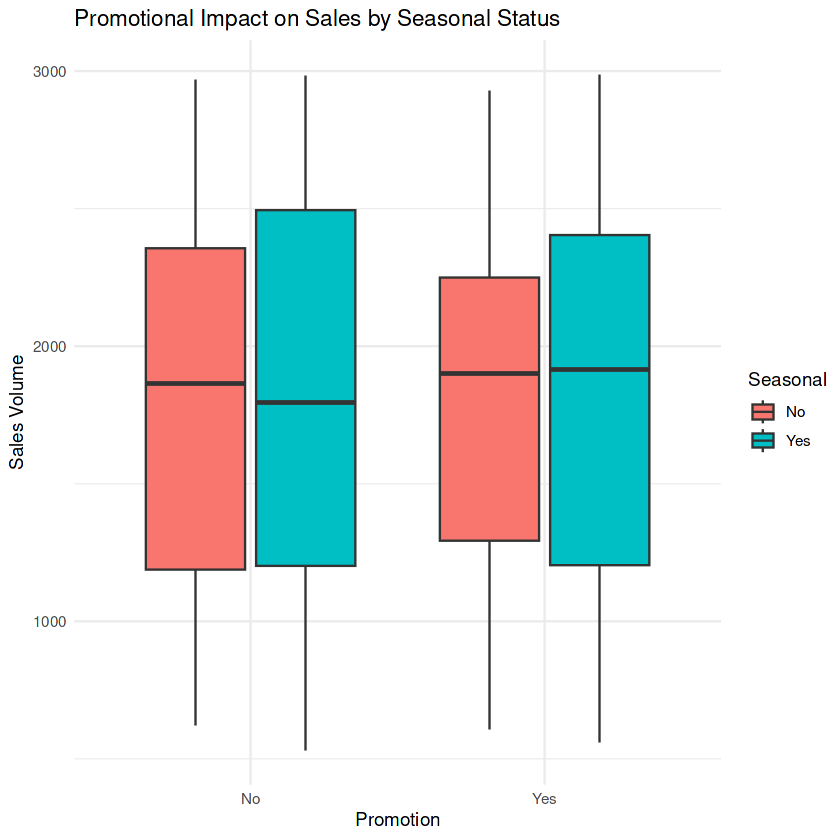

In [110]:
# Promotional impact
ggplot(df, aes(x = Promotion, y = Sales.Volume, fill = Seasonal)) +
  geom_boxplot() +
  labs(title = "Promotional Impact on Sales by Seasonal Status",
       x = "Promotion",
       y = "Sales Volume") +
  theme_minimal()


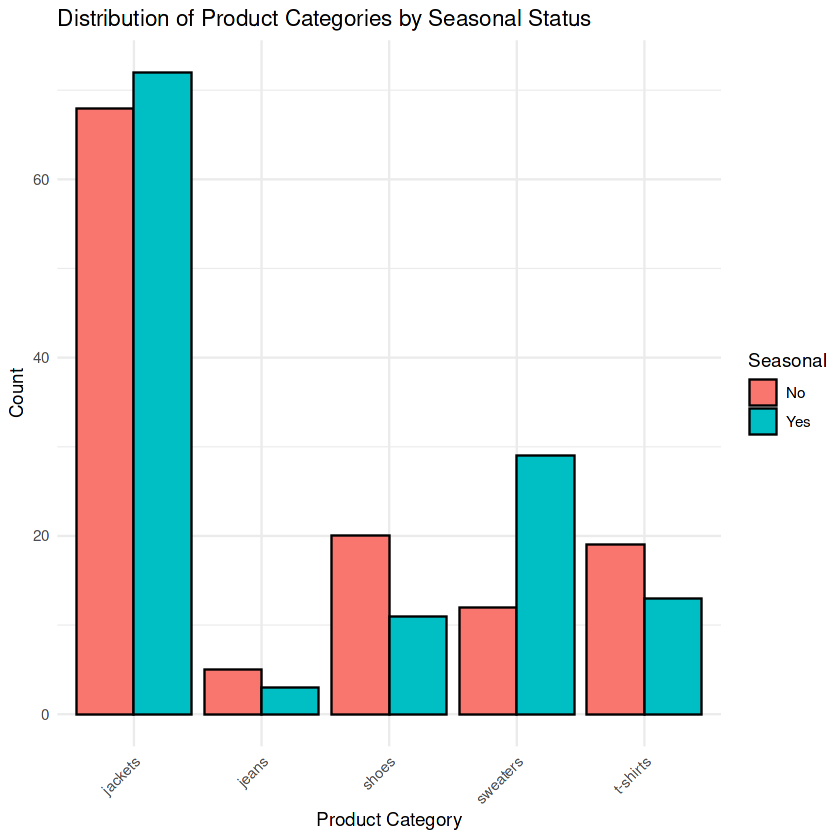

In [114]:
# Product category analysis
ggplot(df, aes(x = terms, fill = Seasonal)) +
  geom_bar(position = "dodge", color = "black") +
  labs(title = "Distribution of Product Categories by Seasonal Status",
       x = "Product Category",
       y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels if needed.


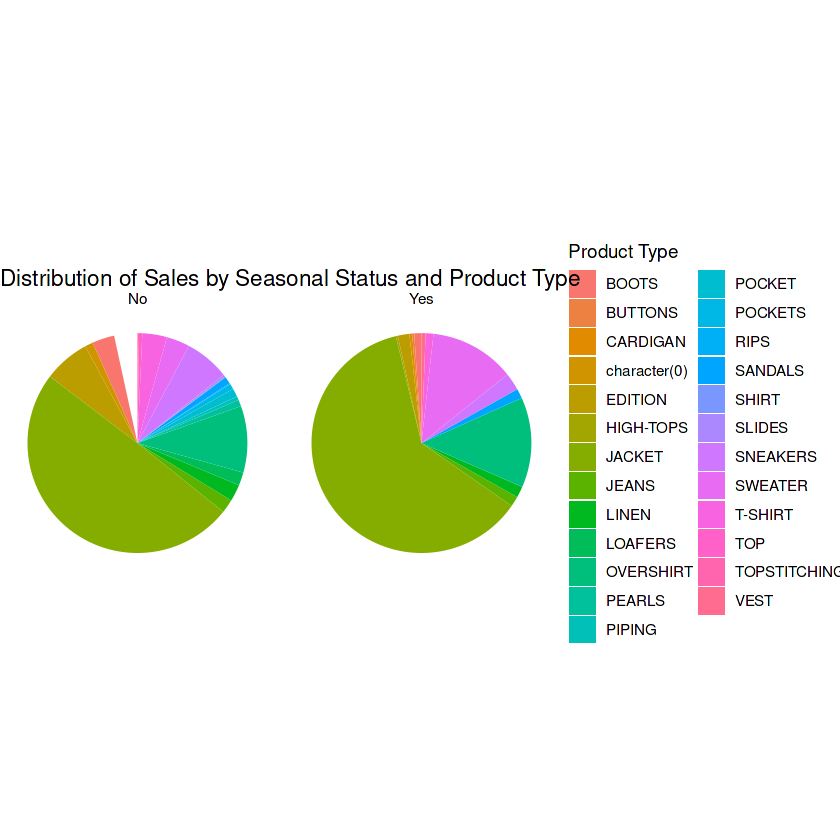

In [119]:
library(ggplot2)

# Aggregate total sales by seasonal status and product type
sales_by_seasonal_product <- aggregate(Total ~ Seasonal + Product_type, data = df_zara, sum)

# Create a pie chart
ggplot(sales_by_seasonal_product, aes(x = "", y = Total, fill = Product_type)) +
  geom_bar(stat = "identity", width = 1) +
  facet_wrap(~Seasonal) +
  coord_polar("y", start = 0) +
  labs(title = "Distribution of Sales by Seasonal Status and Product Type",
       fill = "Product Type") +
  theme_void() +
  theme(legend.position = "right")


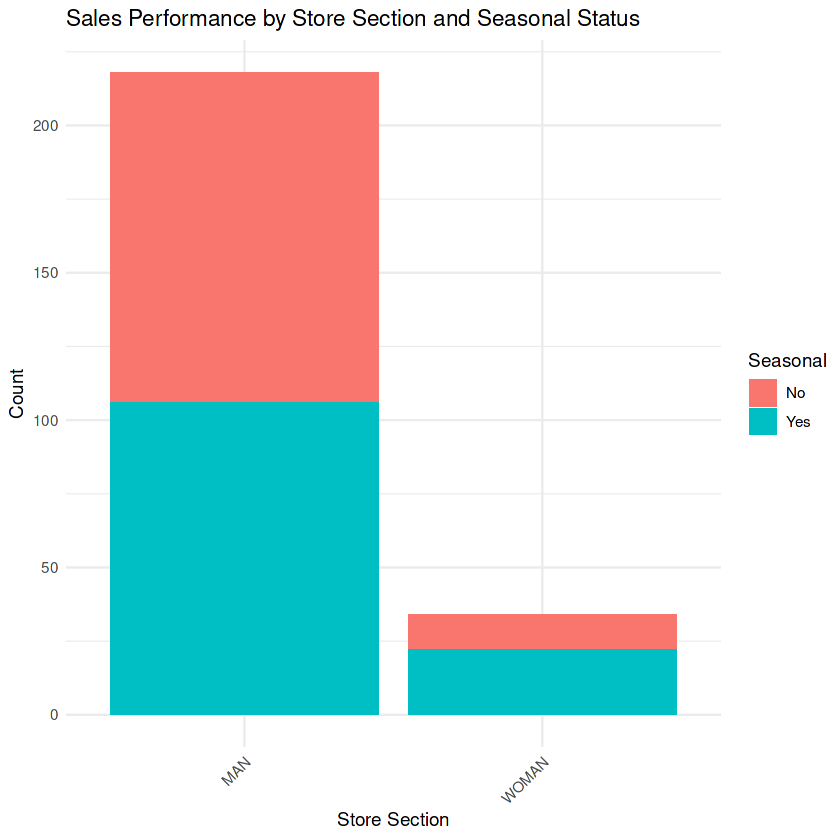

In [120]:
# Section-wise analysis
ggplot(df, aes(x = section, fill = Seasonal)) +
  geom_bar() +
  labs(title = "Sales Performance by Store Section and Seasonal Status",
       x = "Store Section",
       y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels if needed

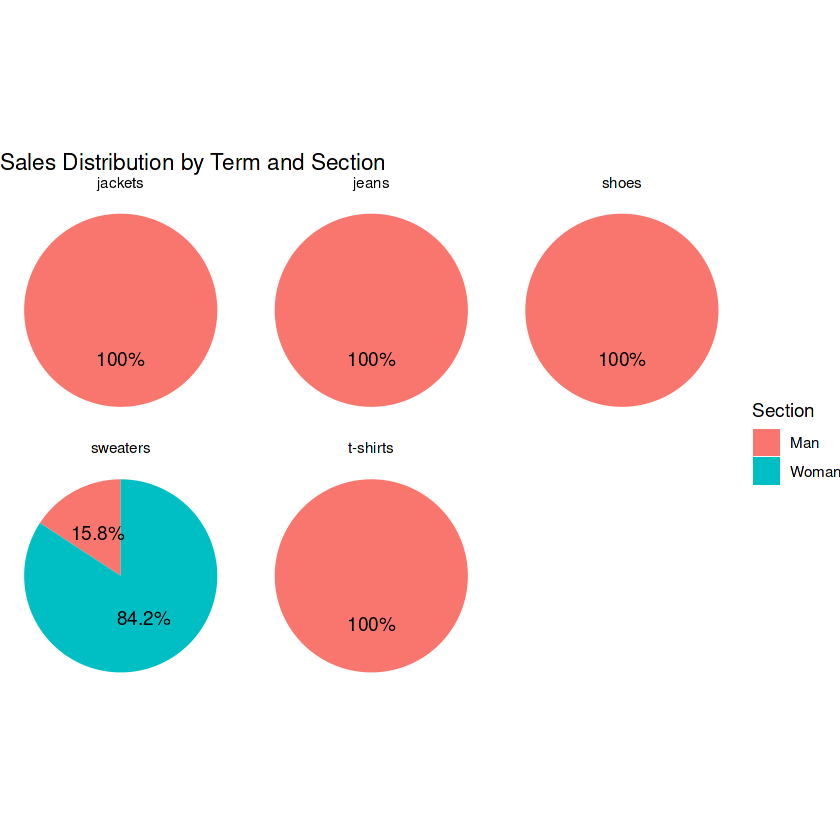

In [123]:
# Group by term and section, calculate total sales
sales_by_term_section <- aggregate(Sales.Volume ~ terms + section, data = df_zara, sum)

# Calculate total sales for each term
total_sales_term <- aggregate(Sales.Volume ~ terms, data = df_zara, sum)

# Calculate percentage of total sales for each term
sales_by_term_section <- merge(sales_by_term_section, total_sales_term, by = "terms")
sales_by_term_section$percent <- sales_by_term_section$Sales.Volume.x / sales_by_term_section$Sales.Volume.y * 100

# Plot multi-layer pie chart
ggplot(sales_by_term_section, aes(x = "", y = percent, fill = section)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(label = paste0(round(percent, 1), "%")), position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  facet_wrap(~terms) +
  labs(title = "Sales Distribution by Term and Section",
       fill = "Section") +
  theme_void() +
  theme(legend.position = "right")
